In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
from time import sleep

In [2]:
class Particle:
    
    def __init__(self,r0,v0,a0,t,m=1,radius=2.5,Id=0):
        
        self.dt = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        self.m = m
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.radius = radius
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.r += self.dt*self.v
        self.v += self.dt*self.a
        
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def SetVelocity(self,i):
        self.V[i] = self.v

    def GetVelocity(self,scale=1):
        return self.V[::scale]

    def CheckLimits(self,Limits):
        
        for i in range(2):
        
            if self.r[i] + self.radius > Limits[i][1] and self.v[i] > 0.:
                self.v[i] = -1.0*self.v[i]
            if self.r[i] - self.radius < Limits[i][0] and self.v[i] < 0.:
                self.v[i] = -1.0*self.v[i]
                
    def CheckCollision(self, other_particle):
        
        F1 = 0.
        distV = (self.r - other_particle.r)
        distance = (distV[0]**2+ distV[1]**2)**(1/2)
    
        if distance < self.radius + other_particle.radius:
            F1 = 0
            k = 1    
            normal = (other_particle.r-self.r) / distance  
            F1= -1*(k*distance**3)*normal 
            self.a = F1/self.m
            
        else:
            F1 = 0
            self.a = 0
    

In [3]:
def RunSimulation1(t, Wall):
    
    # Crear las dos partículas
    r0_1 = np.array([-15.,1.])
    v0_1 = np.array([10.,0.])
    a0_1 = np.array([0.,0])
    p1 = Particle(r0_1, v0_1, a0_1, t)

    r0_2 = np.array([0.,-1.5])
    v0_2 = np.array([0.,0.])
    a0_2 = np.array([0.,0])
    p2 = Particle(r0_2, v0_2, a0_2, t)
    
    Wall_ = Wall.copy()
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps'):
        sleep(0.0001)
        
        # Actualizar ambas partículas
        p1.Evolution(it)
        p2.Evolution(it)
        
        # Comprobar si las partículas han colisionado
        p1.CheckCollision(p2)
        p2.CheckCollision(p1)
        
        # Comprobar límites
        p1.CheckLimits(Wall_)
        p2.CheckLimits(Wall_)
    
    return p1, p2

In [4]:
# Region
Limits = np.array([[-20.,20.],[-20.,20.]])
Limits

array([[-20.,  20.],
       [-20.,  20.]])

In [5]:
dt = 0.05
tmax = 50
t = np.arange(0.,tmax,dt)
Particle1, Particle2 = RunSimulation1(t,Limits)



Running simulation: 100%|█████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 545.22 Steps/s]


In [6]:
scale = 1

In [7]:
t = t[::scale]

<IPython.core.display.Javascript object>


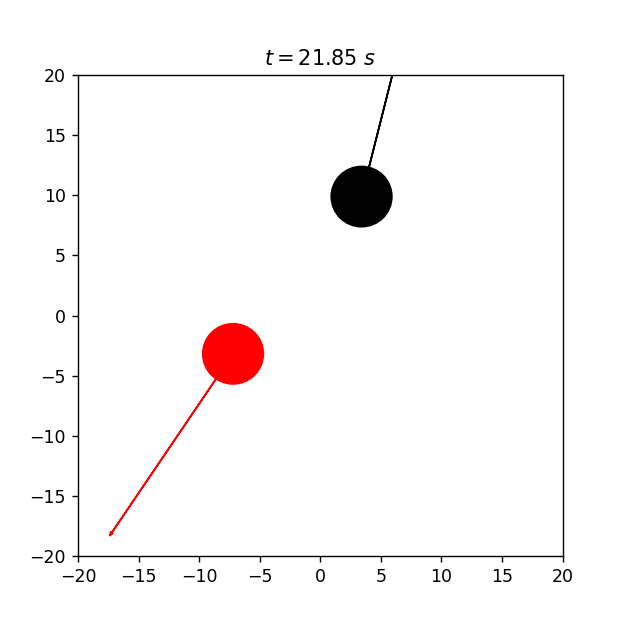

In [8]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

def init():
    ax.set_xlim(Limits[0][0],Limits[0][1])
    ax.set_ylim(Limits[1][0],Limits[1][1])
    
def Update(i):
    
    ax.clear()
    init()
    ax.set_title(r'$ t=%.2f \ s$' %(t[i]))
    
    
    x = Particle1.GetPosition(scale)[i,0]
    y = Particle1.GetPosition(scale)[i,1]
    vx = Particle1.GetVelocity(scale)[i,0]
    vy = Particle1.GetVelocity(scale)[i,1]
    
    x2 = Particle2.GetPosition(scale)[i,0]
    y2 = Particle2.GetPosition(scale)[i,1]
    vx2 = Particle2.GetVelocity(scale)[i,0]
    vy2 = Particle2.GetVelocity(scale)[i,1]
    
  
    
    circle = plt.Circle((x,y),Particle1.radius, fill=True, color='r')
    ax.add_patch(circle)
    
    circle2 = plt.Circle((x2,y2),Particle2.radius, fill=True, color='k')
    ax.add_patch(circle2)


     
    ax.arrow(x,y,vx,vy,color='r',head_width=0.2,length_includes_head=True)
    
    ax.arrow(x2,y2,vx2,vy2,color='k',head_width=0.2,length_includes_head=True)
    

    
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)

